In [4]:
import torch
import numpy as np
import torchvision
import torchvision.transforms as transform
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
from data_prep import trainset, trainloader, testset, testloader, batch_size, fashion_mnist_labels

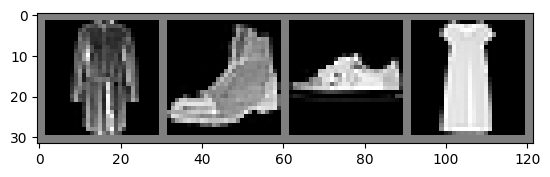

Dress Ankle boot Sneaker Dress


In [5]:
def imshow(img):
    img = img * 0.5 + 0.5  # Denormalize from [-1, 1] to [0, 1]
    plt.imshow(img.permute(1, 2, 0).squeeze(), cmap='gray')
    plt.show()

detailer = iter(trainloader)
imgs, labels = next(detailer)

imshow(torchvision.utils.make_grid(imgs))
print(' '.join(f'{fashion_mnist_labels[labels[j]]:5s}' for j in range(batch_size)))

In [9]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(4*4*16,120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
num_epochs = 5
net.to(device)  # move model first
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
criterion = nn.CrossEntropyLoss()

for epoch in range(num_epochs):
    net.train()
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()  # now all tensors on same device


        # statistics
        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()


    # epoch metrics
    epoch_loss = running_loss / total
    epoch_acc = correct / total * 100

    print(f'Epoch [{epoch+1}/{num_epochs}] | '
          f'Loss: {epoch_loss:.4f} | Accuracy: {epoch_acc:.2f}% | '
          f'Total samples: {total} | Batch size: {trainloader.batch_size}')

cuda
Epoch [1/5] | Loss: 0.2578 | Accuracy: 90.38% | Total samples: 60000 | Batch size: 4
Epoch [2/5] | Loss: 0.2518 | Accuracy: 90.57% | Total samples: 120000 | Batch size: 4
Epoch [3/5] | Loss: 0.2470 | Accuracy: 90.77% | Total samples: 180000 | Batch size: 4
Epoch [4/5] | Loss: 0.2413 | Accuracy: 90.99% | Total samples: 240000 | Batch size: 4
Epoch [5/5] | Loss: 0.2366 | Accuracy: 91.17% | Total samples: 300000 | Batch size: 4


In [23]:
torch.save(net, "model_full.pth")

In [25]:
from PIL import Image

img_path = 'test_image\shirt.jpg'
img = Image.open(img_path).convert("L")

img_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((28, 28)),
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,))
])

img_tensor = img_transform(img)
img_tensor = img_tensor.unsqueeze(0)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
img_tensor = img_tensor.to(device)
net.to(device)

net = torch.load("model_full.pth")
net.eval()  # set model to evaluation mode
with torch.no_grad():
    output = net(img_tensor)
    _, predicted = torch.max(output, 1)

print(f"Predicted class index: {predicted.item()}")

print(f"Predicted label: {fashion_mnist_labels[predicted.item()]}")



Predicted class index: 0
Predicted label: T-shirt/top


C:\Users\nisch\AppData\Local\Temp\ipykernel_17976\1779719962.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net = torch.load("model_full.pth")
